# Trader Behavior vs Market Sentiment (Fear & Greed)

## Objective
This notebook analyzes how Bitcoin market sentiment (Fear vs Greed) affects trader performance and behavior using historical trading data and the Bitcoin Fear & Greed Index.


## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Loading


In [2]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")


In [3]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

## Data Cleaning & Time Alignment

In [8]:
trades["Timestamp"] = pd.to_datetime(trades["Timestamp"], unit="ms")


In [9]:
trades["date"] = trades["Timestamp"].dt.date


In [10]:
trades[["Timestamp", "date"]].head()


,Timestamp,date
0,2024-10-27 03:33:20,2024-10-27
1,2024-10-27 03:33:20,2024-10-27
2,2024-10-27 03:33:20,2024-10-27
3,2024-10-27 03:33:20,2024-10-27
4,2024-10-27 03:33:20,2024-10-27


In [11]:
trades["date"].isna().sum()


np.int64(0)

In [12]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [13]:
sentiment["date"].head()


0    2018-02-01
1    2018-02-02
2    2018-02-03
3    2018-02-04
4    2018-02-05
Name: date, dtype: object

In [14]:
sentiment["date"].dtype


dtype('O')

In [15]:
sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date


In [16]:
sentiment["date"].head()


0    2018-02-01
1    2018-02-02
2    2018-02-03
3    2018-02-04
4    2018-02-05
Name: date, dtype: object

In [17]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [18]:
sentiment["sentiment"] = sentiment["classification"].apply(
    lambda x: "Fear" if "Fear" in x else "Greed"
)


In [19]:
sentiment.columns


Index(['timestamp', 'value', 'classification', 'date', 'sentiment'], dtype='object')

In [20]:
sentiment[["date", "classification", "sentiment"]].head()


,date,classification,sentiment
0,2018-02-01,Fear,Fear
1,2018-02-02,Extreme Fear,Fear
2,2018-02-03,Fear,Fear
3,2018-02-04,Extreme Fear,Fear
4,2018-02-05,Extreme Fear,Fear


## Data Merging

In [21]:
df = pd.merge(
    trades,
    sentiment[["date", "sentiment"]],
    on="date",
    how="left"
)


In [22]:
df["sentiment"].isna().mean()


np.float64(0.12764174525622088)

In [23]:
df = df.dropna(subset=["sentiment"])


In [24]:
df["sentiment"].isna().mean()


np.float64(0.0)

In [25]:
df.groupby("sentiment")["Closed PnL"].mean()


sentiment
Fear     50.047622
Greed    69.958017
Name: Closed PnL, dtype: float64

In [26]:
df.groupby("sentiment")["Closed PnL"].median()


sentiment
Fear     0.0
Greed    0.0
Name: Closed PnL, dtype: float64

## Feature Engineering

In [27]:
df["is_win"] = (df["Closed PnL"] > 0).astype(int)


In [28]:
df[["Closed PnL", "is_win"]].head()


,Closed PnL,is_win
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


## Win Rate Analysis

In [29]:
df.groupby("sentiment")["is_win"].mean()


sentiment
Fear     0.415146
Greed    0.434176
Name: is_win, dtype: float64

In [30]:
df.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'sentiment', 'is_win'],
      dtype='object')

## Risk Exposure Analysis

In [31]:
df.groupby("sentiment")["Size USD"].mean()


sentiment
Fear     5259.977837
Greed    3507.574148
Name: Size USD, dtype: float64

In [32]:
df.groupby("sentiment")["Size USD"].median()


sentiment
Fear     605.07
Greed    550.99
Name: Size USD, dtype: float64

## Profitability Analysis


In [33]:
df.groupby("sentiment")["Closed PnL"].mean()


sentiment
Fear     50.047622
Greed    69.958017
Name: Closed PnL, dtype: float64

In [34]:
df.groupby("sentiment")["Closed PnL"].median()


sentiment
Fear     0.0
Greed    0.0
Name: Closed PnL, dtype: float64

## Visual Analysis


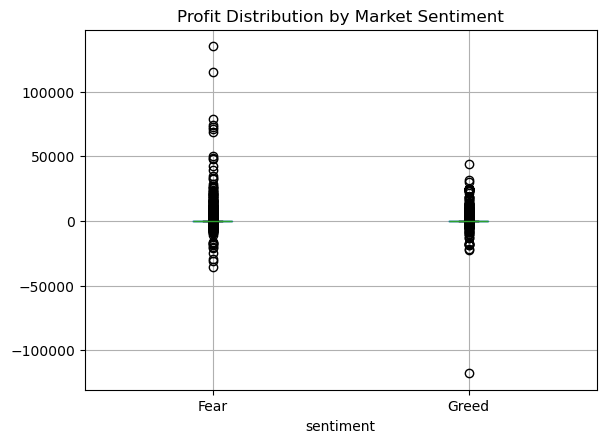

In [35]:
df.boxplot(column="Closed PnL", by="sentiment")
plt.title("Profit Distribution by Market Sentiment")
plt.suptitle("")
plt.show()


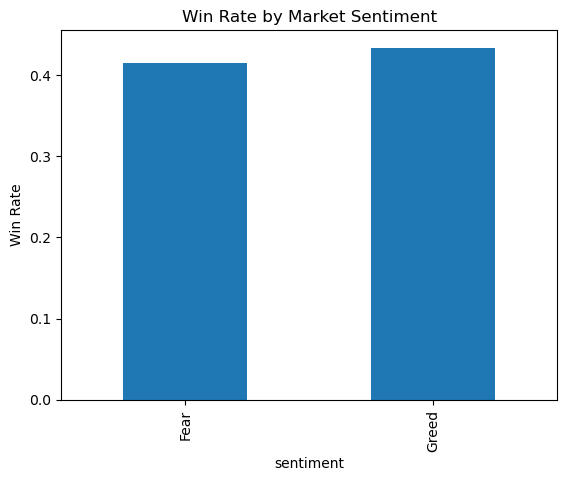

In [36]:
df.groupby("sentiment")["is_win"].mean().plot(kind="bar")
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.show()
